In [1]:
## Import necessary libraries, read in the local .csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('Mall_Customers.csv')

In [2]:
## Examine the data
print(df.head())
print(df.shape)
print(df.columns)
print(df.describe)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17  

In [3]:
## Drop Customer_ID column as it is irrelevant for our purposes.
df.drop(['CustomerID'], axis=1, inplace=True)

In [4]:
# Examine new dataframe structure
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(12.085, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

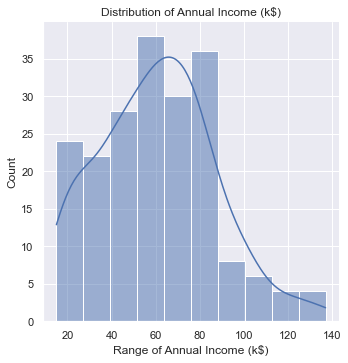

In [6]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.displot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(12.085, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

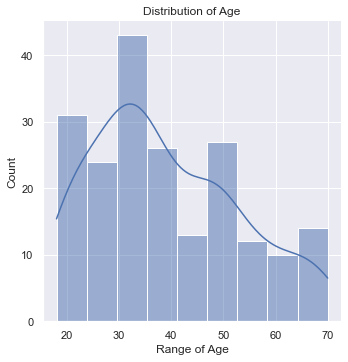

In [7]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.displot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

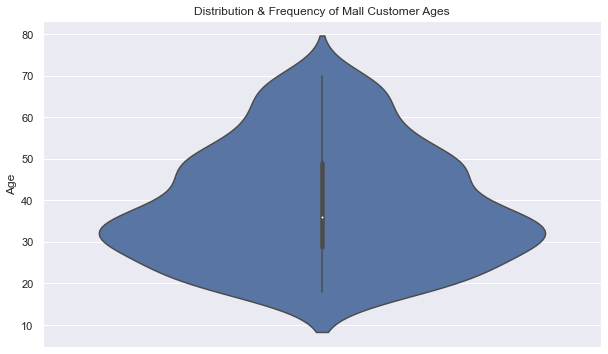

In [8]:
# Understand distribution & frequency of mall customers by Age. Would like to add X-ticks here.
plt.figure(figsize=(10,6))
plt.title("Distribution & Frequency of Mall Customer Ages")
sns.violinplot(y=df["Age"])
plt.show()

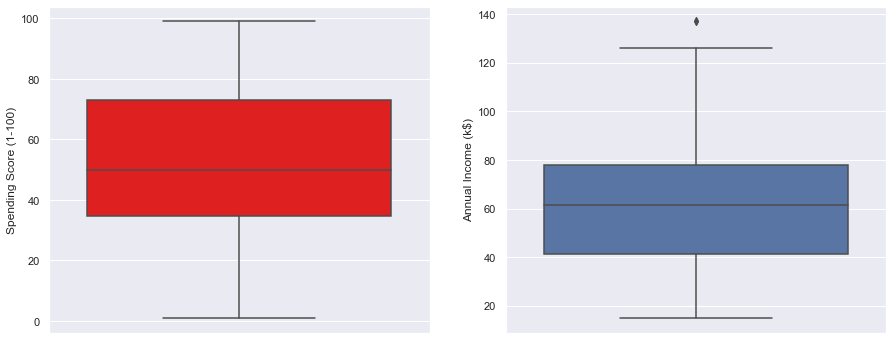

In [9]:
# Understand distribution of Spending Score (left) vs. annual income (right). The scales are slightly different here-- perhaps normalization would be beneficial.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

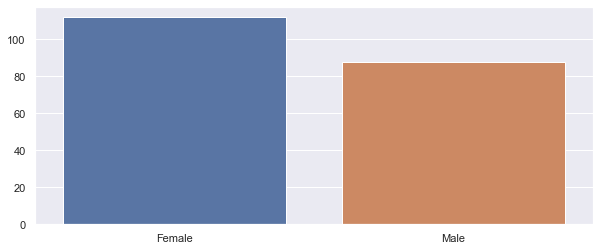

In [10]:
## Distriubtion of genders amongst mall customers. More female than male customers.
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

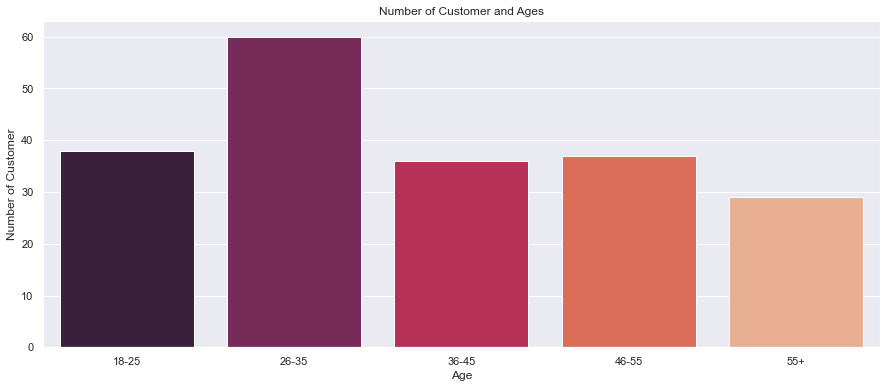

In [11]:
# Break out data into subsets based on age ranges i.e. 18-25, 26-35, 36-45, 46-55, 55+
## Plot number of customers in each age subset. 26-35 is most represented.
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

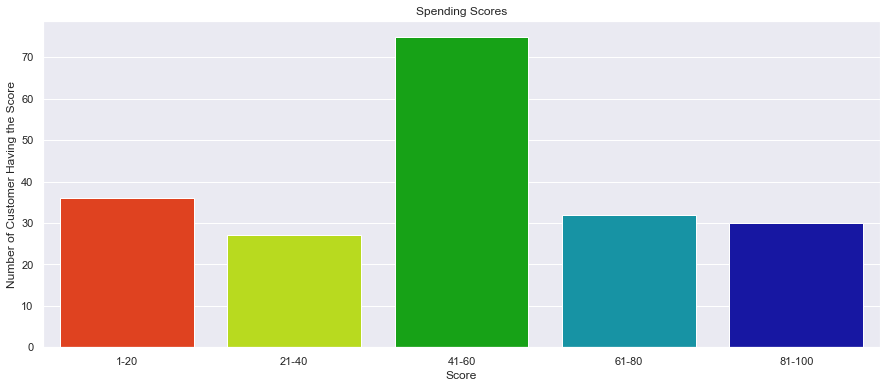

In [12]:
# Break out data into subsets based on spending scores i.e. 1-20, 21-40, 41-60, 61-80, 81-100
## Plot number of customers in each spending score subset. 41-60 is most represented.
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

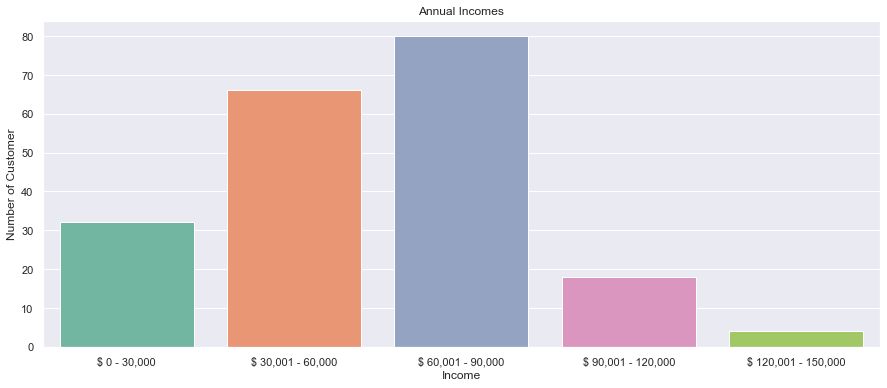

In [13]:
# Break out data into subsets based on annual income ranges i.e. 0-30k, 31-60k, 61-90k, 91-120k, 121-150k
## Plot number of customers in each annual income subset. 60-90k is most represented.
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

C:\Users\nated\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


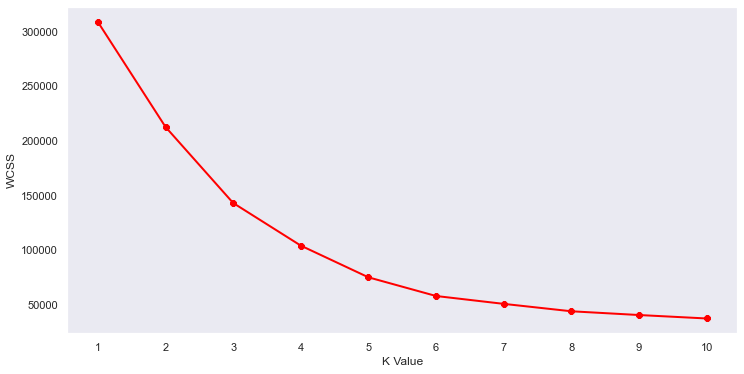

In [14]:
## Run K-Means clustering on the data using K values from 1-10. Plot the resulting inertia scores to determine optimal K value.
##  WCSS = Within Cluster Sum of Squared Errors. Basically the error value for each cluster (distance between cluster points and their respective centroids).
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

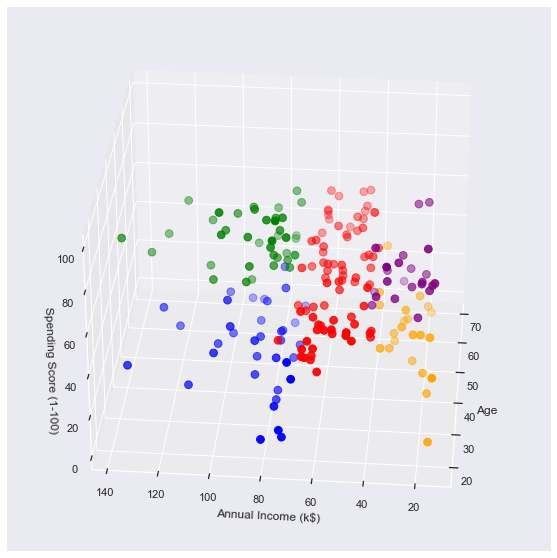

In [15]:
## K Value of 5 is the inflection point for the inertia results. Plot 3D scatter of the data using Age, Income, Spending Score, colors represent cluster label..
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

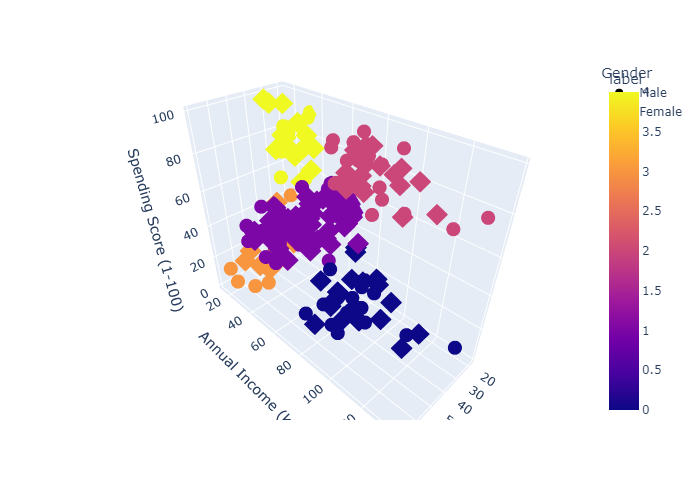

In [18]:
# Plotly is an easier tool for this. Plotting data in 3D scatter using Age, income, and spending score. Color represents cluster labels and point shape represents gender.
# Plotly outputs an embedded HTML image, allowing you to rotate,zoom and hover on individual points in the table. It is recommended you view this notebook in Colaboratory or Jupyter to have full functionality. 
# Simply remove the 'png' paramenter from the .show() call below when viewing in a native format. 
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='label', symbol='Gender')
fig.show('png')

In [17]:
segments = [0,1,2,3,4]
for i in segments:
    print("The gender breakdown for segment " + str(i) + ' is: ' + '\n' + str(df.Gender[df.label==i].value_counts()))

The gender breakdown for segment 0 is: 
Male      19
Female    17
Name: Gender, dtype: int64
The gender breakdown for segment 1 is: 
Female    46
Male      33
Name: Gender, dtype: int64
The gender breakdown for segment 2 is: 
Female    21
Male      18
Name: Gender, dtype: int64
The gender breakdown for segment 3 is: 
Female    14
Male       9
Name: Gender, dtype: int64
The gender breakdown for segment 4 is: 
Female    14
Male       9
Name: Gender, dtype: int64


# Understanding results: 
## 5 Segments:
1. **Segment 0** - `Dark Blue`: Low income, low spending score. Wide distribution of ages, gender distribution skews female.
    * *Given this is a low income/low spending score segment, perhaps targeting them with coupons/discounts would encourage shopping in our store?*
2. **Segment 1** - `Purple`: High Income, High Spending Score. Young (below 40) and roughly even gender distribution.
    * *Target this segment with nurture marketing efforts. Ideal customers.*
3. **Segment 2** - `Salmon`:  Middle Income . Middle spending score. wide age range. female dominant. most populous segment.
    * *Target this segment with nurture and growth marketing efforts. Largest customer segment, likely accounts for bulk of shop revenue (data not available)*
4. **Segment 3** - `Orange`: High income. Low spending score. roughly equal gender distribution, age distribution 20-60. 
    * *Target with growth marketing efforts. This segment has low spending score relative to their income.*
5. **Segment 4** - `Yellow`: Low income. High Spending Score. Skew younger. Skews female gender distribution.
    * *Target with discount marketing, nuture. Income will ggrow as age increase for these customers.*